# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestNeighbors

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
df1 = pd.read_csv('garisKemiskinan.csv')
df1.head()

,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0


In [ ]:
df2 = pd.read_csv('minUpah.csv')
df2.head()

,provinsi,tahun,ump
0,ACEH,2002,330000.0
1,ACEH,2003,425000.0
2,ACEH,2004,550000.0
3,ACEH,2005,620000.0
4,ACEH,2006,820000.0


In [ ]:
df3 = pd.read_csv ('pengeluaran.csv')
df3.head()

,provinsi,daerah,jenis,tahun,peng
0,ACEH,PERDESAAN,MAKANAN,2007,195176.0
1,ACEH,PERDESAAN,MAKANAN,2008,218781.0
2,ACEH,PERDESAAN,MAKANAN,2009,247427.0
3,ACEH,PERDESAAN,MAKANAN,2010,275749.0
4,ACEH,PERDESAAN,MAKANAN,2011,308000.0


In [ ]:
df4 = pd.read_csv('rataRataUpah.csv')
df4.head()

,provinsi,tahun,upah
0,ACEH,2015,11226
1,ACEH,2016,13627
2,ACEH,2017,14809
3,ACEH,2018,13814
4,ACEH,2019,15065


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  735 non-null    object 
 1   tahun     735 non-null    int64  
 2   ump       711 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 17.4+ KB


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  4620 non-null   object 
 1   daerah    4620 non-null   object 
 2   jenis     4620 non-null   object 
 3   tahun     4620 non-null   int64  
 4   peng      4512 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.6+ KB


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   provinsi  280 non-null    object
 1   tahun     280 non-null    int64 
 2   upah      280 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.7+ KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
#1 Memahami Struktur Data

# Mengetahui jumlah baris dan kolom
print(f"Jumlah Baris: {df1.shape[0]} | Jumlah Kolom: {df1.shape[1]}")
print (f"Jumlah Baris: {df2.shape[0]} | Jumlah Kolom: {df2.shape[1]}")
print (f"Jumlah Baris: {df3.shape[0]} | Jumlah Kolom: {df3.shape[1]}")
print (f"Jumlah Baris: {df4.shape[0]} | Jumlah Kolom: {df4.shape[1]}")

print ('--------------------------------------')

# Mengetahui tipe data pada dataset
print (df1.dtypes)
print (df2.dtypes)
print (df3.dtypes)
print (df4.dtypes)

Jumlah Baris: 5460 | Jumlah Kolom: 6
Jumlah Baris: 735 | Jumlah Kolom: 3
Jumlah Baris: 4620 | Jumlah Kolom: 5
Jumlah Baris: 280 | Jumlah Kolom: 3
--------------------------------------
provinsi     object
jenis        object
daerah       object
tahun         int64
periode      object
gk          float64
dtype: object
provinsi     object
tahun         int64
ump         float64
dtype: object
provinsi     object
daerah       object
jenis        object
tahun         int64
peng        float64
dtype: object
provinsi    object
tahun        int64
upah         int64
dtype: object


In [ ]:
#2 Menangani Data yang Hilang

# Identifikasi missing value
df1.isnull().sum()

,0
provinsi,0
jenis,0
daerah,0
tahun,0
periode,0
gk,199


In [ ]:
df2.isnull().sum()

,0
provinsi,0
tahun,0
ump,24


In [ ]:
df3.isnull().sum()

,0
provinsi,0
daerah,0
jenis,0
tahun,0
peng,108


In [ ]:
df3.isnull().sum()

,0
provinsi,0
daerah,0
jenis,0
tahun,0
peng,108


In [ ]:
df4.isnull().sum()

,0
provinsi,0
tahun,0
upah,0


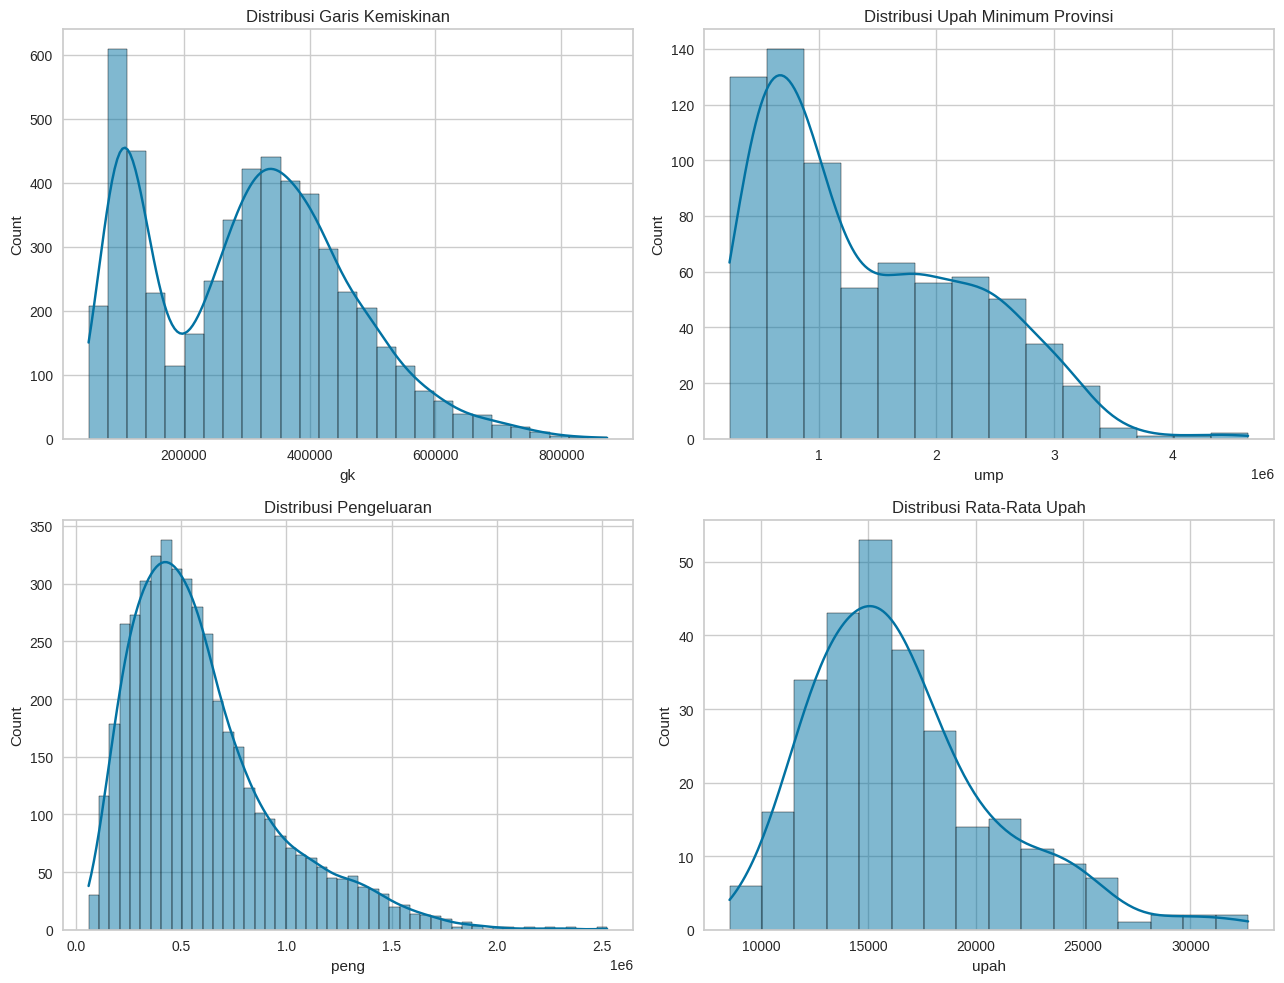

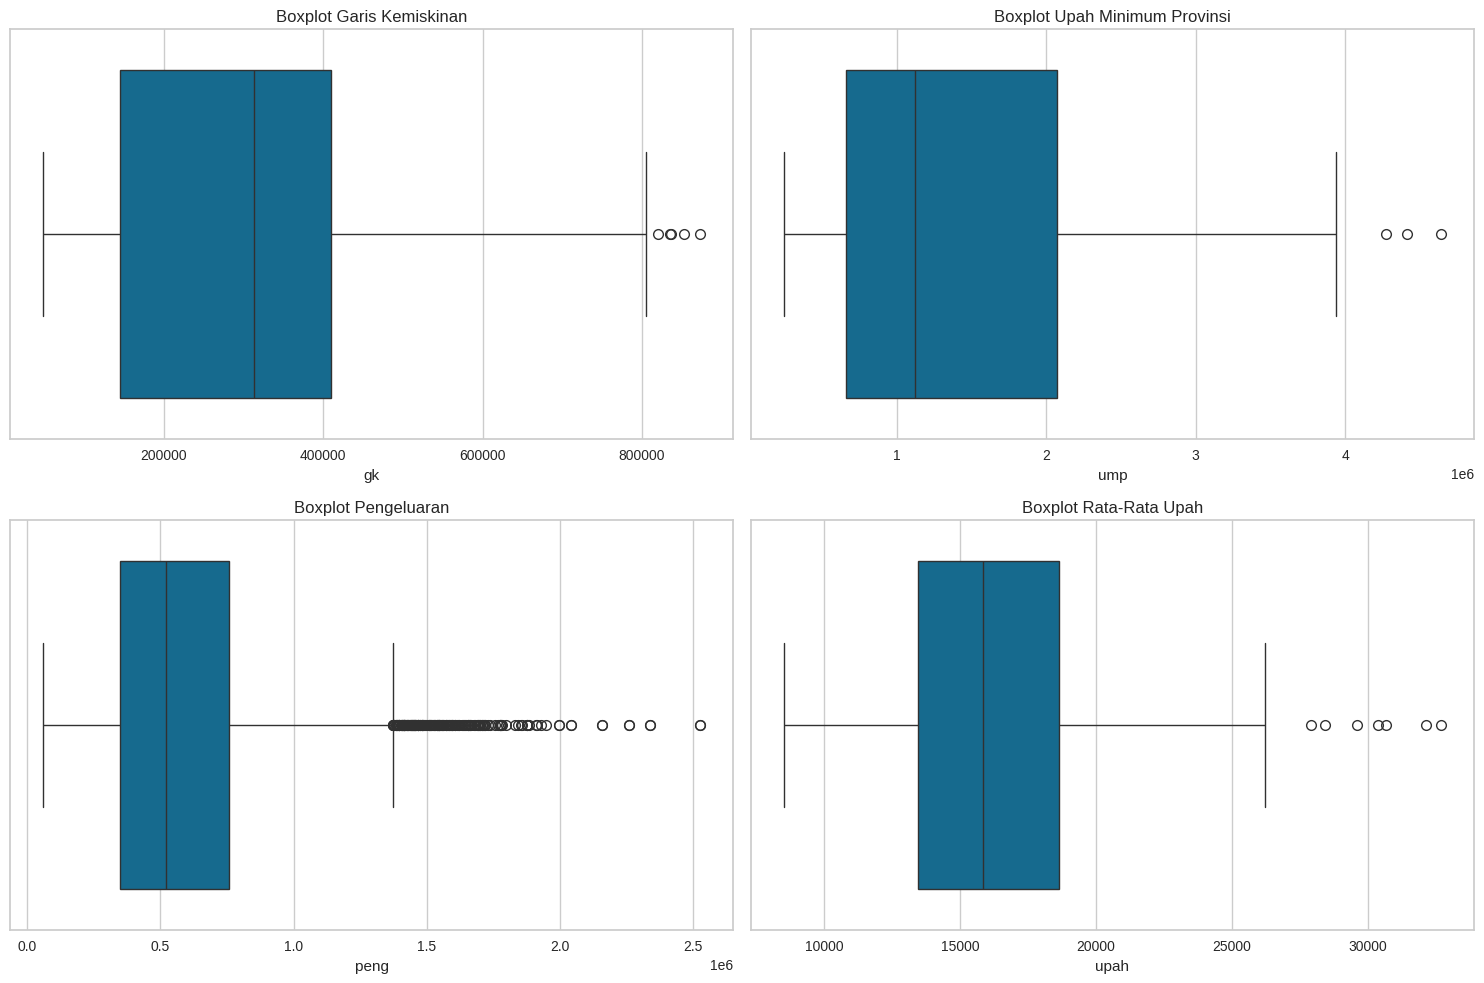

In [ ]:
#3 Analisis Distribusi dan Korelasi

# Visualisasi distribusi dengan histogram
plt.figure(figsize=(13, 10))

plt.subplot(2, 2, 1)
sns.histplot(df1['gk'], kde=True)
plt.title('Distribusi Garis Kemiskinan')

plt.subplot(2, 2, 2)
sns.histplot(df2['ump'], kde=True)
plt.title('Distribusi Upah Minimum Provinsi')

plt.subplot(2, 2, 3)
sns.histplot(df3['peng'], kde=True)
plt.title('Distribusi Pengeluaran')

plt.subplot(2, 2, 4)
sns.histplot(df4['upah'], kde=True)
plt.title('Distribusi Rata-Rata Upah')

plt.tight_layout()
plt.show()

# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x=df1['gk'])
plt.title('Boxplot Garis Kemiskinan')

plt.subplot(2, 2, 2)
sns.boxplot(x=df2['ump'])
plt.title('Boxplot Upah Minimum Provinsi')

plt.subplot(2, 2, 3)
sns.boxplot(x=df3['peng'])
plt.title('Boxplot Pengeluaran')

plt.subplot(2, 2, 4)
sns.boxplot(x=df4['upah'])
plt.title('Boxplot Rata-Rata Upah')

plt.tight_layout()
plt.show()

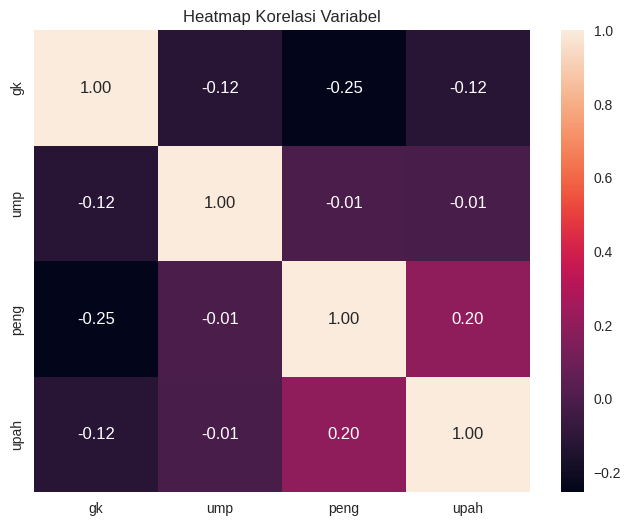

In [ ]:
df_merged = df1[['gk']].merge(df2[['ump']], left_index=True, right_index=True) \
                                       .merge(df3[['peng']], left_index=True, right_index=True) \
                                       .merge(df4[['upah']], left_index=True, right_index=True)

# Membuat heatmap korelasi
plt.figure(figsize=(8,6))
sns.heatmap(df_merged.corr(), annot=True, fmt=".2f", linecolor="black")
plt.title("Heatmap Korelasi Variabel")
plt.show()

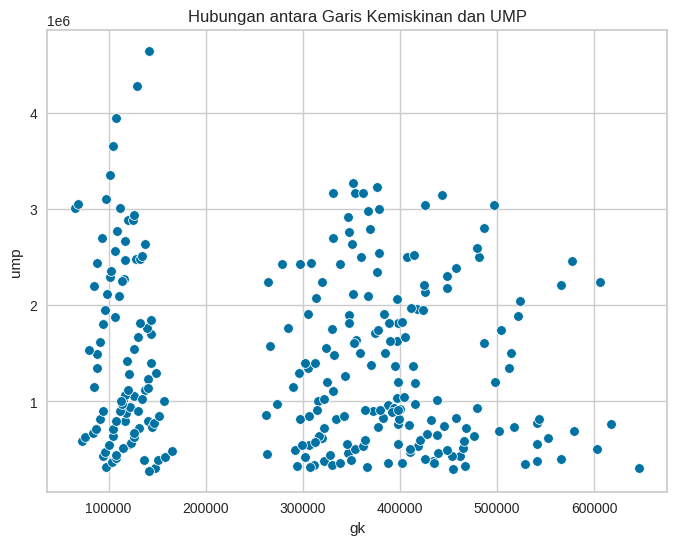

In [18]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='gk', y='ump', data=df_merged)
plt.title('Hubungan antara Garis Kemiskinan dan UMP')
plt.xlabel('gk')
plt.ylabel('ump ')
plt.show()

<ipython-input-19-880bbe9fb1f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='daerah', y='gk', data=df1, palette='pastel')


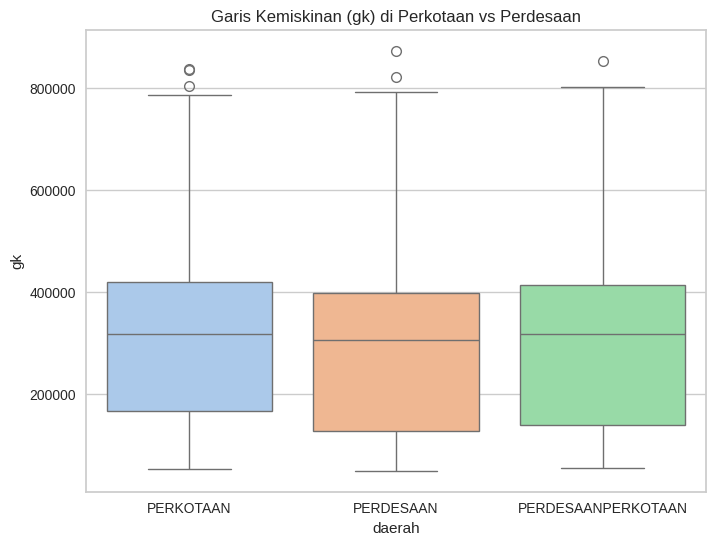

<ipython-input-19-880bbe9fb1f6>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='jenis', y='gk', data=df1, ci=None, palette='muted')
<ipython-input-19-880bbe9fb1f6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='jenis', y='gk', data=df1, ci=None, palette='muted')


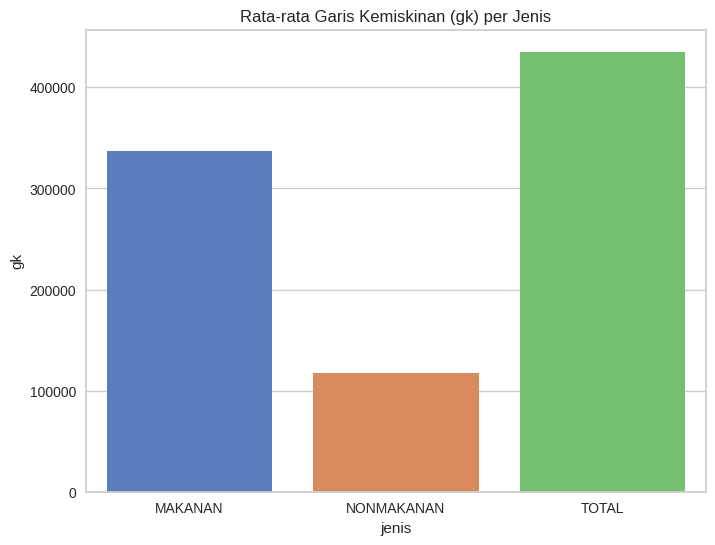

In [19]:
# Membandingkan 'gk' antara daerah PERKOTAAN vs PERDESAAN
plt.figure(figsize=(8, 6))
sns.boxplot(x='daerah', y='gk', data=df1, palette='pastel')
plt.title('Garis Kemiskinan (gk) di Perkotaan vs Perdesaan')
plt.show()

# Bandingkan 'gk' berdasarkan jenis (MAKANAN/NONMAKANAN/TOTAL)
plt.figure(figsize=(8, 6))
sns.barplot(x='jenis', y='gk', data=df1, ci=None, palette='muted')
plt.title('Rata-rata Garis Kemiskinan (gk) per Jenis')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [20]:
#1 Mengatasi Missing Value

# Mengatasi missing value menggunakan metode interpolate dan imputation
df1['gk'].fillna(df1['gk'].mean(), inplace=True)
df1['gk'].interpolate(method='linear', inplace=True)

df2['ump'].fillna(df2['ump'].mean(), inplace=True)
df2['ump'].interpolate(method='linear', inplace=True)

df3['peng'].fillna(df3['peng'].mean(), inplace=True)
df3['peng'].interpolate(method='linear', inplace=True)

<ipython-input-20-c68047170e99>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gk'].fillna(df1['gk'].mean(), inplace=True)
<ipython-input-20-c68047170e99>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [21]:
# cek hasil dari missing value
print(df1.isna().sum())
print("----------------")
print(df2.isna().sum())
print("----------------")
print(df3.isna().sum())
print("----------------")
print(df4.isna().sum())

provinsi    0
jenis       0
daerah      0
tahun       0
periode     0
gk          0
dtype: int64
----------------
provinsi    0
tahun       0
ump         0
dtype: int64
----------------
provinsi    0
daerah      0
jenis       0
tahun       0
peng        0
dtype: int64
----------------
provinsi    0
tahun       0
upah        0
dtype: int64


In [22]:
#2 Menghapus data duplikat

print("Jumlah duplikasi: ", df1.duplicated().sum())
print("Jumlah duplikasi: ", df2.duplicated().sum())
print("Jumlah duplikasi: ", df3.duplicated().sum())
print("Jumlah duplikasi: ", df4.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0
Jumlah duplikasi:  0
Jumlah duplikasi:  0


Tidak ada duplikasi data

In [23]:
#4 Deteksi dan Penanganan Outlier

# Identifikasi kolom gk
Q1 = df1['gk'].quantile(0.25)
Q3 = df1['gk'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df1[(df1['gk'] < lower_bound) | (df1['gk'] > upper_bound)]
print(f"Jumlah outlier dalam 'gk': {len(outliers)}")

Jumlah outlier dalam 'gk': 9


In [24]:
# Identifikasi kolom ump
Q1 = df2['ump'].quantile(0.25)
Q3 = df2['ump'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df2[(df2['ump'] < lower_bound) | (df2['ump'] > upper_bound)]
print(f"Jumlah outlier dalam 'ump': {len(outliers)}")

Jumlah outlier dalam 'ump': 3


In [25]:
# Identifikasi kolom peng
Q1 = df3['peng'].quantile(0.25)
Q3 = df3['peng'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df3[(df3['peng'] < lower_bound) | (df3['peng'] > upper_bound)]
print(f"Jumlah outlier dalam 'peng': {len(outliers)}")

Jumlah outlier dalam 'peng': 210


In [26]:
# Identifikasi kolom upah
Q1 = df4['upah'].quantile(0.25)
Q3 = df4['upah'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df4[(df4['upah'] < lower_bound) | (df4['upah'] > upper_bound)]
print(f"Jumlah outlier dalam 'upah': {len(outliers)}")

Jumlah outlier dalam 'upah': 7


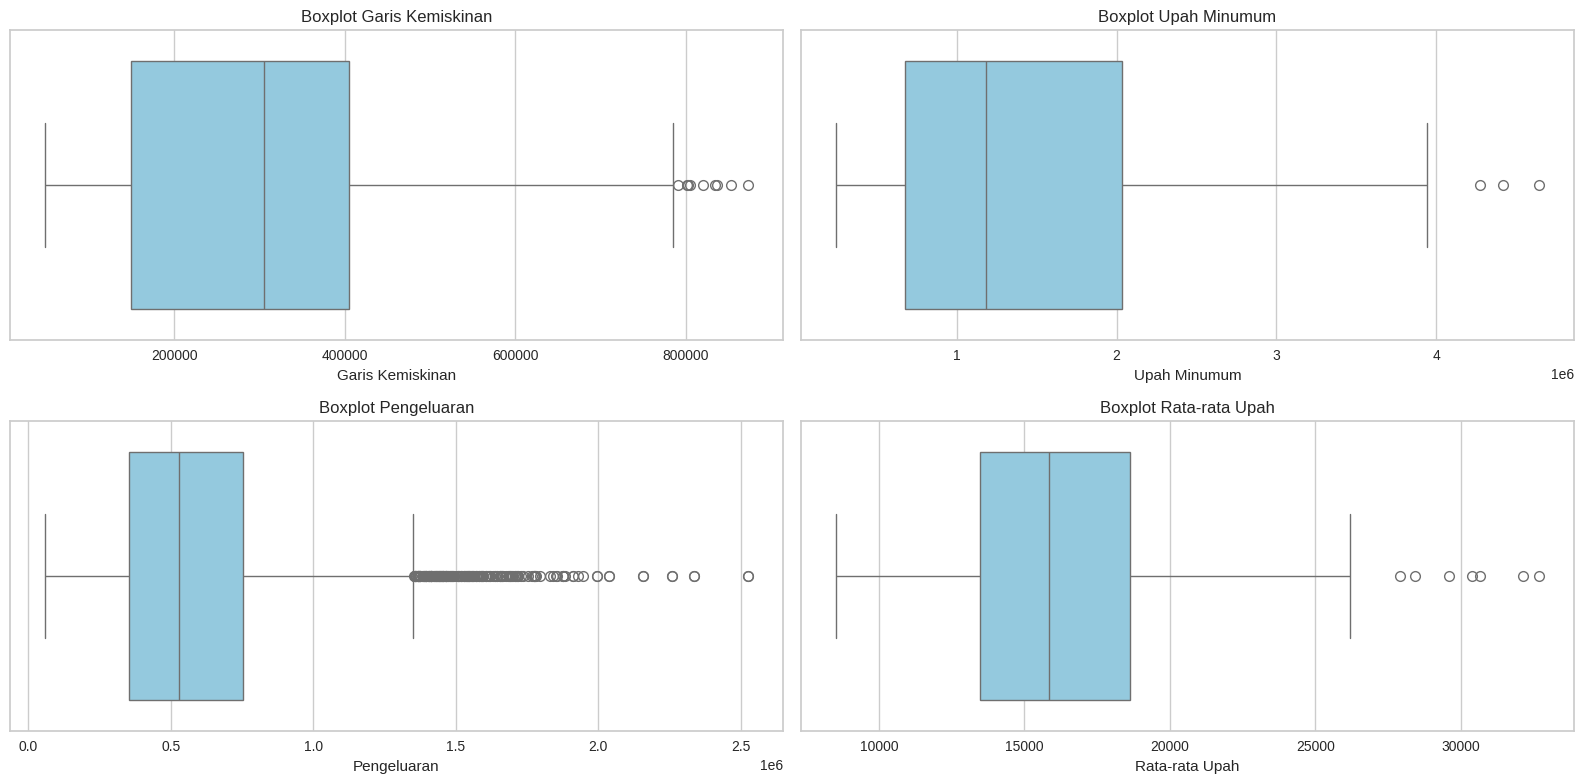

In [27]:
plt.figure(figsize=(16, 8))
for i, (df, column, title) in enumerate(zip(
        [df1, df2, df3, df4],
        ['gk', 'ump', 'peng', 'upah'],
        ['Garis Kemiskinan', 'Upah Minumum', 'Pengeluaran', 'Rata-rata Upah']), 1):

    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Boxplot {title}')
    plt.xlabel(title)

plt.tight_layout()
plt.show()

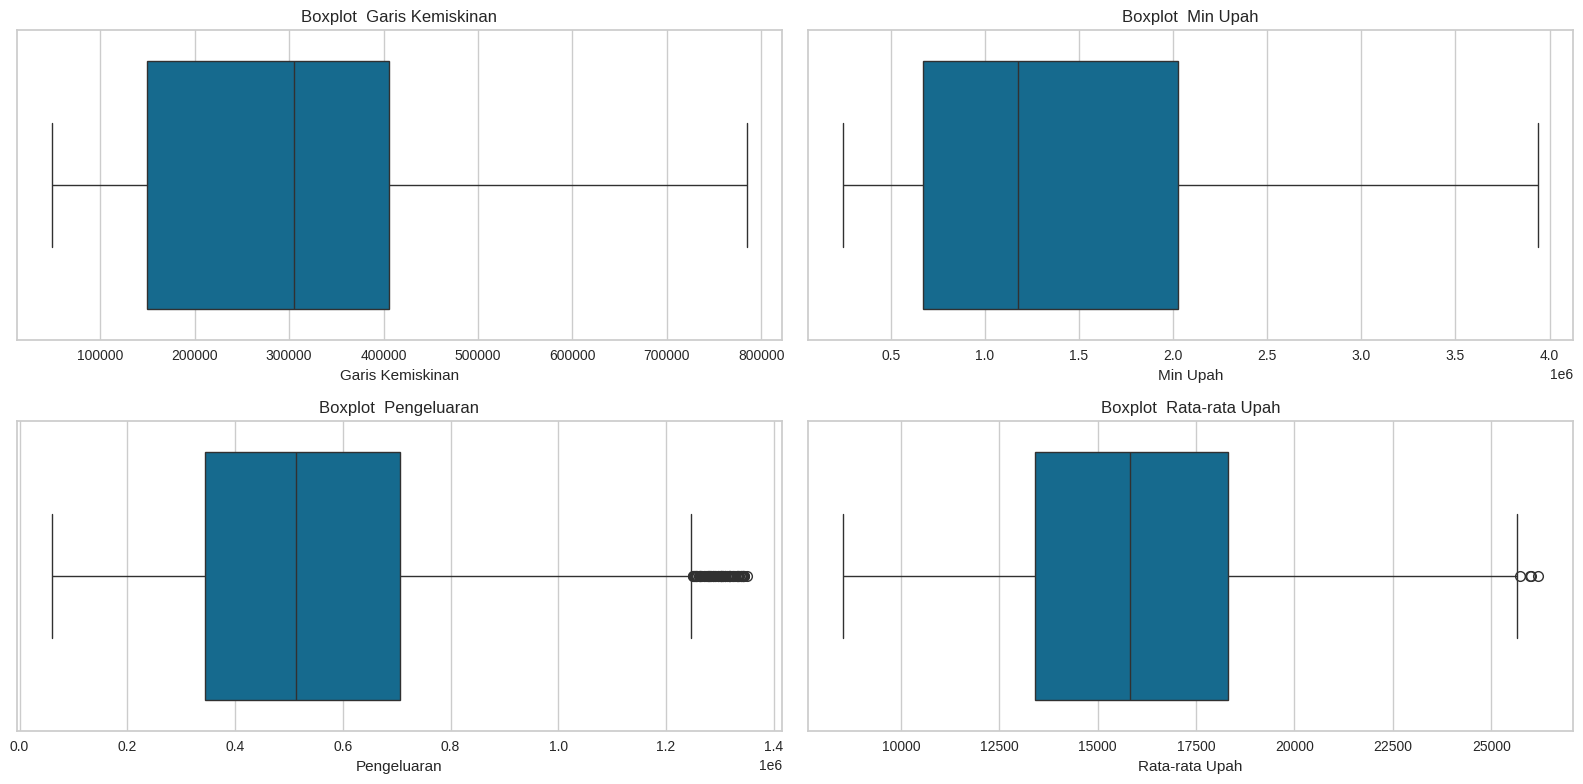

In [28]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned
# Membersihkan outlier dari setiap dataset
df_gk = remove_outliers(df1, 'gk')
df_ump = remove_outliers(df2, 'ump')
df_peng = remove_outliers(df3, 'peng')
df_upah = remove_outliers(df4, 'upah')

plt.figure(figsize=(16, 8))
for i, (df, column, title) in enumerate(zip(
        [df_gk, df_ump, df_peng, df_upah],
        ['gk', 'ump', 'peng', 'upah'],
        ['Garis Kemiskinan', 'Min Upah', 'Pengeluaran', 'Rata-rata Upah']), 1):

    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot  {title}')
    plt.xlabel(title)

plt.tight_layout()
plt.show()

In [29]:
merged_df = df_upah.merge(df_gk, on=['provinsi', 'tahun']) \
                       .merge(df_ump, on=['provinsi', 'tahun']) \
                       .merge(df_peng, on=['provinsi', 'tahun'])

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40733 entries, 0 to 40732
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  40733 non-null  object 
 1   tahun     40733 non-null  int64  
 2   upah      40733 non-null  int64  
 3   jenis_x   40733 non-null  object 
 4   daerah_x  40733 non-null  object 
 5   periode   40733 non-null  object 
 6   gk        40733 non-null  float64
 7   ump       40733 non-null  float64
 8   daerah_y  40733 non-null  object 
 9   jenis_y   40733 non-null  object 
 10  peng      40733 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 3.4+ MB


In [30]:
merged_df

,provinsi,tahun,upah,jenis_x,daerah_x,periode,gk,ump,daerah_y,jenis_y,peng
0,ACEH,2015,11226,MAKANAN,PERKOTAAN,MARET,293697.0,1900000.0,PERDESAAN,MAKANAN,395136.0
1,ACEH,2015,11226,MAKANAN,PERKOTAAN,MARET,293697.0,1900000.0,PERDESAAN,NONMAKANAN,260183.0
2,ACEH,2015,11226,MAKANAN,PERKOTAAN,MARET,293697.0,1900000.0,PERDESAAN,TOTAL,655319.0
3,ACEH,2015,11226,MAKANAN,PERKOTAAN,MARET,293697.0,1900000.0,PERKOTAAN,MAKANAN,466355.0
4,ACEH,2015,11226,MAKANAN,PERKOTAAN,MARET,293697.0,1900000.0,PERKOTAAN,NONMAKANAN,529945.0
...,...,...,...,...,...,...,...,...,...,...,...
40728,INDONESIA,2022,17542,TOTAL,PERDESAANPERKOTAAN,SEPTEMBER,535547.0,2729463.0,PERKOTAAN,MAKANAN,721083.0
40729,INDONESIA,2022,17542,TOTAL,PERDESAANPERKOTAAN,SEPTEMBER,535547.0,2729463.0,PERKOTAAN,NONMAKANAN,828158.0
40730,INDONESIA,2022,17542,TOTAL,PERDESAANPERKOTAAN,SEPTEMBER,535547.0,2729463.0,PERDESAANPERKOTAAN,MAKANAN,665756.0
40731,INDONESIA,2022,17542,TOTAL,PERDESAANPERKOTAAN,SEPTEMBER,535547.0,2729463.0,PERDESAANPERKOTAAN,NONMAKANAN,662025.0


In [31]:
#3 Normalisasi atau Standarisasi Fitur

numerical_cols = ['gk', 'ump', 'peng', 'upah']
selected_data = df_merged[numerical_cols]


In [32]:
scaler = RobustScaler()
scaled_data = scaler.fit_transform(selected_data)

In [33]:
# Inisialisasi scaler
scaler = StandardScaler()

# Standarisasi data
data_standardized = scaler.fit_transform(selected_data)

# Konversi ke DataFrame
df_standardized = pd.DataFrame(data_standardized, columns=numerical_cols)
print(df_standardized.head())

         gk       ump      peng      upah
0 -0.026111 -1.168961 -1.209015 -1.236257
1  0.030503 -1.063984 -1.124903 -0.686072
2  0.058135 -0.925858 -1.022829 -0.415219
3  0.148956 -0.848507 -0.921909 -0.643221
4 -0.000715 -0.627505 -0.806988 -0.356557


In [36]:
# Menambahkan kolom hasil scalling ke df utama
df_merged[numerical_cols] = df_standardized
print(df_merged.head())

         gk       ump      peng      upah
0 -0.026111 -1.168961 -1.209015 -1.236257
1  0.030503 -1.063984 -1.124903 -0.686072
2  0.058135 -0.925858 -1.022829 -0.415219
3  0.148956 -0.848507 -0.921909 -0.643221
4 -0.000715 -0.627505 -0.806988 -0.356557


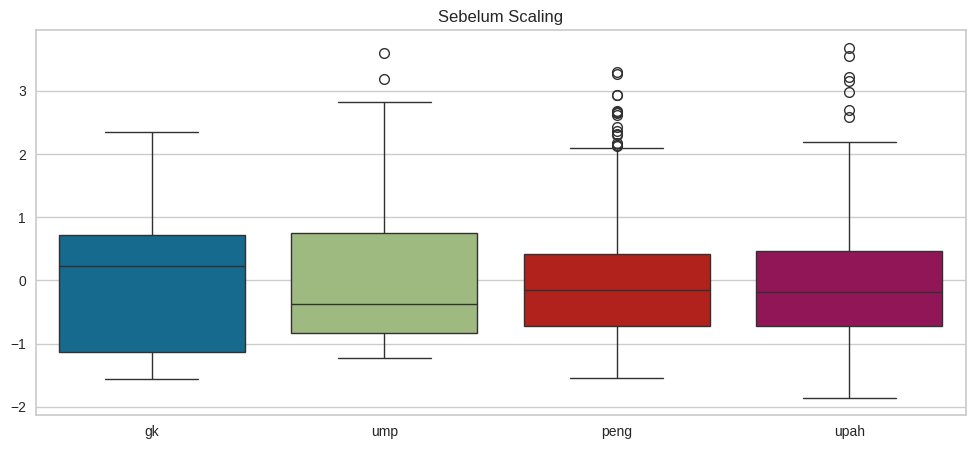

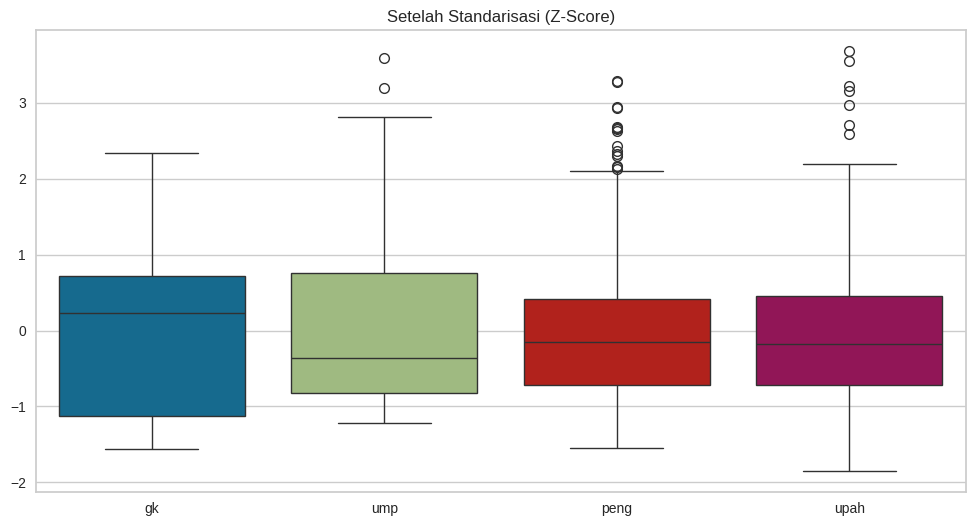

In [37]:
# Sebelum scaling
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_merged)
plt.title('Sebelum Scaling')
plt.show()

# Sesudah standarisasi
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_standardized)
plt.title('Setelah Standarisasi (Z-Score)')
plt.show()

In [38]:
#5 Encoding Data Kategorikal
encoders = {}

for col in merged_df:
    le = LabelEncoder()
    merged_df[col] = le.fit_transform(merged_df[col])
    encoders[col] = le

In [39]:
#buat salinan
df_encoded = merged_df.copy()

In [40]:
#6 Binning

# Mapping label encoded tahun ke tahun asli
mapping_tahun = {
    0: 2014,
    1: 2015,
    2: 2016,
    3: 2017,
    4: 2018,
    5: 2019,
    6: 2020,
    7: 2021,
    8: 2022
}

# Buat kolom tahun asli
df_encoded['tahun_asli'] = df_encoded['tahun'].map(mapping_tahun)

In [41]:
# Definisikan bins dan label kategori
bins = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
labels = [
    '2014-2015', '2015-2016', '2016-2017', '2017-2018',
    '2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023'
]

# Lakukan binning
df_encoded['tahun_kategori'] = pd.cut(
    df_encoded['tahun_asli'],
    bins=bins,
    labels=labels,
    right=False
)


In [42]:
label_encoder_kategori = LabelEncoder()
df_encoded['tahun_kategori'] = label_encoder_kategori.fit_transform(
    df_encoded['tahun_kategori']
)

In [43]:
# Cek hasil binning
print(df_encoded[['tahun_asli', 'tahun_kategori']].drop_duplicates())


      tahun_asli  tahun_kategori
0           2014               0
162         2015               1
324         2016               2
486         2017               3
648         2018               4
810         2019               5
954         2020               6
1098        2021               7


In [44]:
print("\nData setelah binning:")
print(df_encoded)


Data setelah binning:
       provinsi  tahun  upah  jenis_x  daerah_x  periode    gk  ump  daerah_y  \
0             0      0    13        0         2        0  2180   67         0   
1             0      0    13        0         2        0  2180   67         0   
2             0      0    13        0         2        0  2180   67         0   
3             0      0    13        0         2        0  2180   67         2   
4             0      0    13        0         2        0  2180   67         2   
...         ...    ...   ...      ...       ...      ...   ...  ...       ...   
40728         7      7   180        2         1        1  4470  193         2   
40729         7      7   180        2         1        1  4470  193         2   
40730         7      7   180        2         1        1  4470  193         1   
40731         7      7   180        2         1        1  4470  193         1   
40732         7      7   180        2         1        1  4470  193         1   

    

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [45]:
# Fitur yang digunakan untuk clustering
fitur_clustering = df_encoded[[
    'gk',
    'peng',
    'ump',
    'upah'
]]

# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(fitur_clustering)


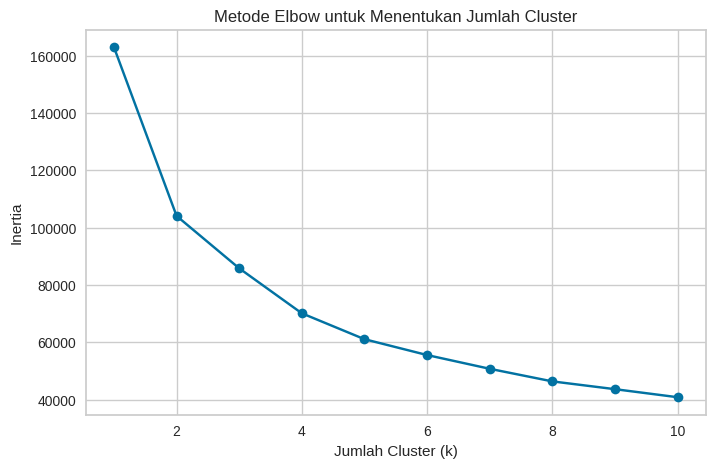

In [46]:
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


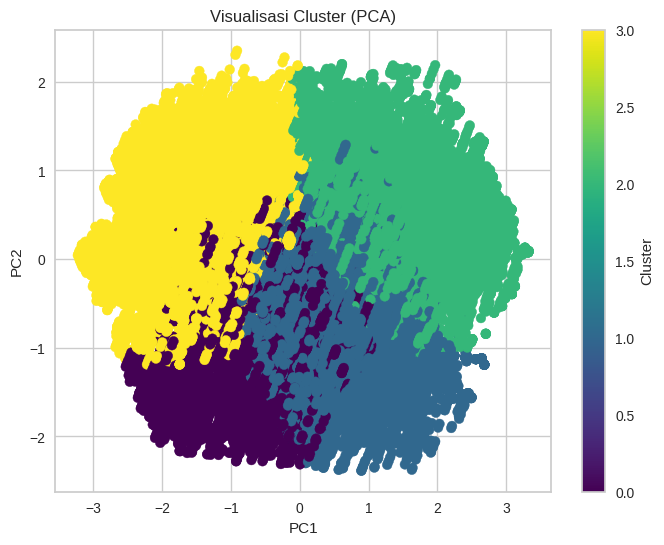

In [47]:
# Buat model KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Simpan hasil cluster ke dataframe
df_encoded['cluster'] = kmeans.labels_


# Visualisasi cluster
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_encoded['cluster'], cmap='viridis')
plt.title('Visualisasi Cluster (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

In [48]:
# Evaluasi kualitas clustering menggunakan sillhouette score
range_n_clusters = range(2, 11)
silhouette_scores = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)
    print(f"Jumlah cluster = {k}, Silhouette Score = {score:.4f}")

Jumlah cluster = 2, Silhouette Score = 0.3103
Jumlah cluster = 3, Silhouette Score = 0.2758
Jumlah cluster = 4, Silhouette Score = 0.2788
Jumlah cluster = 5, Silhouette Score = 0.2728
Jumlah cluster = 6, Silhouette Score = 0.2621
Jumlah cluster = 7, Silhouette Score = 0.2579
Jumlah cluster = 8, Silhouette Score = 0.2490
Jumlah cluster = 9, Silhouette Score = 0.2368
Jumlah cluster = 10, Silhouette Score = 0.2383


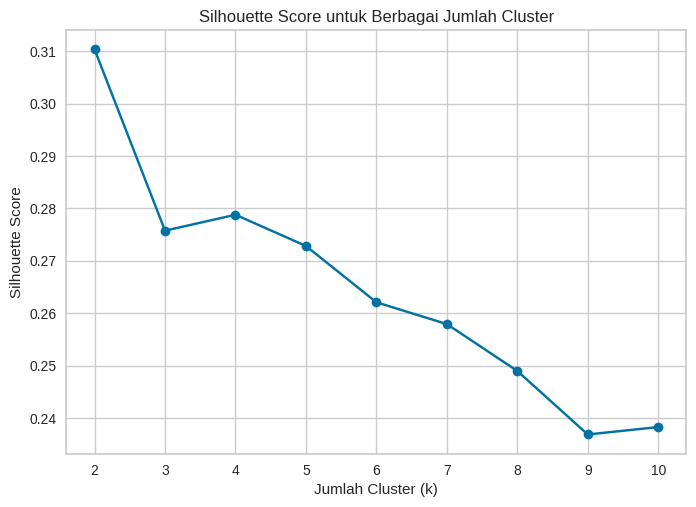

In [49]:
#Visualisasi pemilihan k
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score untuk Berbagai Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [68]:
# Latih ulang model terbaik
optimal_k = 2
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_optimal.fit_predict(X_scaled)

# Tambahkan ke data
fitur_clustering['Cluster'] = cluster_labels

# Hitung silhouette score-nya
final_score = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score akhir: {final_score:.4f}")


<ipython-input-68-065345964e33>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fitur_clustering['Cluster'] = cluster_labels


Silhouette Score akhir: 0.3103


###**c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection

Jumlah fitur asli: 5, setelah PCA: 2
Silhouette Score setelah PCA: 0.4038


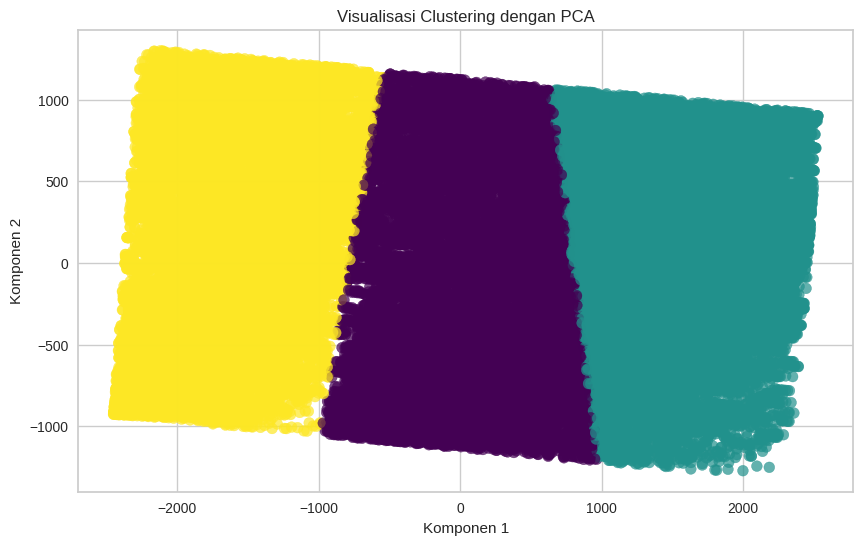

In [66]:
# REDUKSI DIMENSI DENGAN PCA

X_selected = df_encoded.values

# Lakukan PCA untuk mempertahankan 95% variansi
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(fitur_clustering)

# Tampilkan jumlah komponen yang dihasilkan
print(f"Jumlah fitur asli: {fitur_clustering.shape[1]}, setelah PCA: {X_pca.shape[1]}")


# MODEL CLUSTERING DENGAN DATA PCA
# Gunakan jumlah cluster optimal dari silhouette score sebelumnya (yaitu 2)
optimal_k = 3
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_pca.fit(X_pca)
labels_pca = kmeans_pca.labels_

# 3. EVALUASI DENGAN SILHOUETTE SCORE
score_pca = silhouette_score(X_pca, labels_pca)
print(f"Silhouette Score setelah PCA: {score_pca:.4f}")

# 4. VISUALISASI CLUSTER
plt.figure(figsize=(10, 6))
plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=labels_pca, cmap='viridis', s=60, alpha=0.7
)
plt.title('Visualisasi Clustering dengan PCA')
plt.xlabel('Komponen 1')
plt.ylabel('Komponen 2')
plt.grid(True)
plt.show()


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

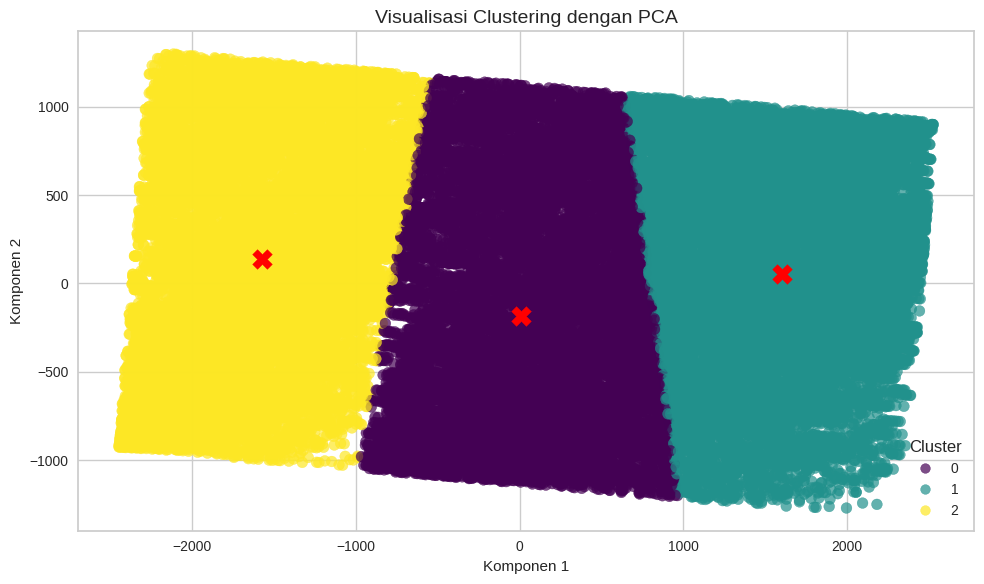

In [69]:
# 4. VISUALISASI CLUSTER (PCA)
# Mendapatkan centroid dari hasil clustering di ruang PCA
centroids = kmeans_pca.cluster_centers_

# Membuat scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=labels_pca,
    cmap='viridis',
    s=60,
    alpha=0.7,
    label=labels_pca
)

# Menambahkan centroid ke plot
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    c='red', marker='X', s=200, label='Centroids'
)

clustered_df = df_encoded.copy()
clustered_df['cluster'] = kmeans.labels_

# Tambahkan judul
plt.title('Visualisasi Clustering dengan PCA', fontsize=14)
plt.xlabel('Komponen 1')
plt.ylabel('Komponen 2')

# Tambahkan legenda
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [88]:
# 1. Tambahkan Hasil Label Cluster ke DataFrame
# Salin data normalisasi agar tidak mengganggu data asli
clustered_df = df_encoded.copy()
clustered_df['cluster'] = kmeans.labels_

# 2. Inverse Transform ke Skala Asli dan Kategori
# Inverse transform fitur numerik: gk, ump, peng, upah
numerical_cols = ['gk', 'ump', 'peng', 'upah']
clustered_df[numerical_cols] = scaler.inverse_transform(clustered_df[numerical_cols])

# Inverse transform untuk kolom tahun_kategori
clustered_df['tahun_kategori'] = label_encoder_kategori.inverse_transform(clustered_df['tahun_kategori'])

print("Data asli setelah inverse transform:")
print(clustered_df.head())

Data asli setelah inverse transform:
   provinsi  tahun         upah  jenis_x  daerah_x  periode            gk  \
0         0      0  1105.749736        0         2        0  2.995836e+06   
1         0      0  1105.749736        0         2        0  2.995836e+06   
2         0      0  1105.749736        0         2        0  2.995836e+06   
3         0      0  1105.749736        0         2        0  2.995836e+06   
4         0      0  1105.749736        0         2        0  2.995836e+06   

            ump  daerah_y  jenis_y          peng  tahun_asli tahun_kategori  \
0  44425.241102         0        0  16237.134784        2014      2014-2015   
1  44425.241102         0        1    754.051627        2014      2014-2015   
2  44425.241102         0        2  86511.950573        2014      2014-2015   
3  44425.241102         2        0  34972.372394        2014      2014-2015   
4  44425.241102         2        1  52435.027826        2014      2014-2015   

   cluster  
0        3  

In [ ]:
print("Jumlah cluster unik:", clustered_df['cluster'].nunique())

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [87]:
# Statistik deskriptif umum per cluster
deskriptif_per_cluster = df_encoded.groupby('cluster').describe()
deskriptif_per_cluster


provinsi                                                       tahun  \
           count       mean        std  min   25%   50%   75%   max    count   
cluster                                                                        
0         8174.0  15.639344  10.045868  0.0   8.0  12.0  23.0  34.0   8174.0   
1         8767.0  18.617315  10.548602  0.0   9.0  19.0  28.0  34.0   8767.0   
2        11683.0  17.575708   9.850569  0.0  12.0  17.0  26.0  34.0  11683.0   
3        12109.0  17.208853  10.115752  0.0   9.0  19.0  27.0  34.0  12109.0   

                   ... tahun_asli         tahun_kategori                      \
             mean  ...        75%     max          count      mean       std   
cluster            ...                                                         
0        2.438096  ...     2018.0  2021.0         8174.0  2.438096  2.049736   
1        4.272157  ...     2020.0  2021.0         8767.0  4.272157  2.008726   
2        4.614654  ...     2020.0  2021.0        11683.0  4.614654  1.945569   
3        1.988769  ...     2017.0  2021.0        12109.0  1.988769  1.880526   

                                  
         min  25%  50%  75%  max  
cluster                           
0        0.0  1.0  2.0  4.0  7.0  
1        0.0  3.0  5.0  6.0  7.0  
2        0.0  3.0  5.0  6.0  7.0  
3        0.0  0.0  2.0  3.0  7.0  

[4 rows x 104 columns]

In [75]:
# Rata-rata fitur per cluster
rata2_per_cluster = df_encoded.groupby('cluster').mean(numeric_only=True)
rata2_per_cluster


,provinsi,tahun,upah,jenis_x,daerah_x,periode,gk,ump,daerah_y,jenis_y,peng,tahun_asli,tahun_kategori
cluster,,,,,,,,,,,,,
0,15.639344,2.438096,72.251652,0.940910,0.999266,0.497431,2061.416565,64.637142,1.184365,1.729019,1707.839491,2016.438096,2.438096
1,18.617315,4.272157,183.742215,0.834151,0.978784,0.489677,1249.589597,172.238736,0.957910,0.843732,1266.049732,2018.272157,4.272157
2,17.575708,4.614654,183.030985,1.209963,1.019173,0.510314,3885.563982,173.603698,0.927673,0.832748,1307.034837,2018.614654,4.614654
3,17.208853,1.988769,63.285986,0.952845,0.997440,0.498472,1896.587001,60.299529,0.800479,0.513998,443.048972,2015.988769,1.988769


In [77]:
# Standar deviasi fitur per cluster
std_per_cluster = df_encoded.groupby('cluster').std(numeric_only=True)
std_per_cluster


,provinsi,tahun,upah,jenis_x,daerah_x,periode,gk,ump,daerah_y,jenis_y,peng,tahun_asli,tahun_kategori
cluster,,,,,,,,,,,,,
0,10.045868,2.049736,46.723709,0.823197,0.816147,0.500024,1170.505375,41.757042,0.808402,0.555362,333.834522,2.049736,2.049736
1,10.548602,2.008726,46.992873,0.437629,0.820125,0.499922,643.806271,46.507246,0.810288,0.777853,548.592912,2.008726,2.008726
2,9.850569,1.945569,50.539846,0.977751,0.813961,0.499915,608.814681,43.677390,0.808166,0.771385,541.025013,1.945569,1.945569
3,10.115752,1.880526,46.493491,0.809797,0.816240,0.500018,1160.756770,43.203038,0.783668,0.541541,298.342855,1.880526,1.880526


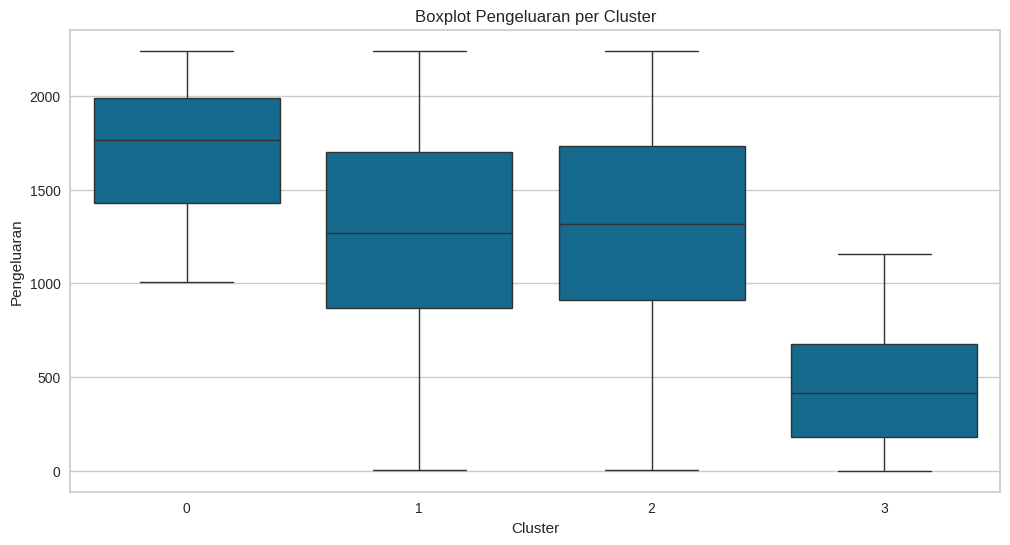

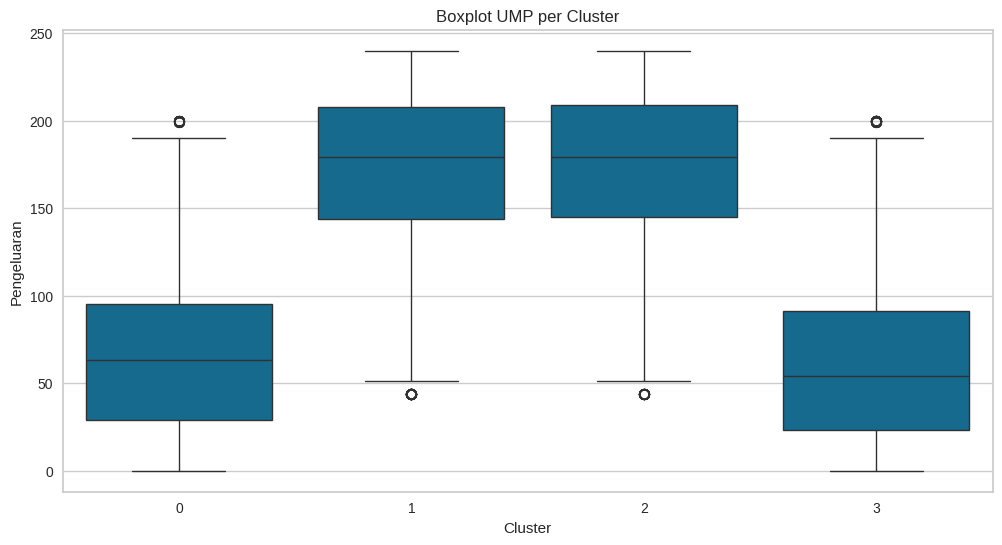

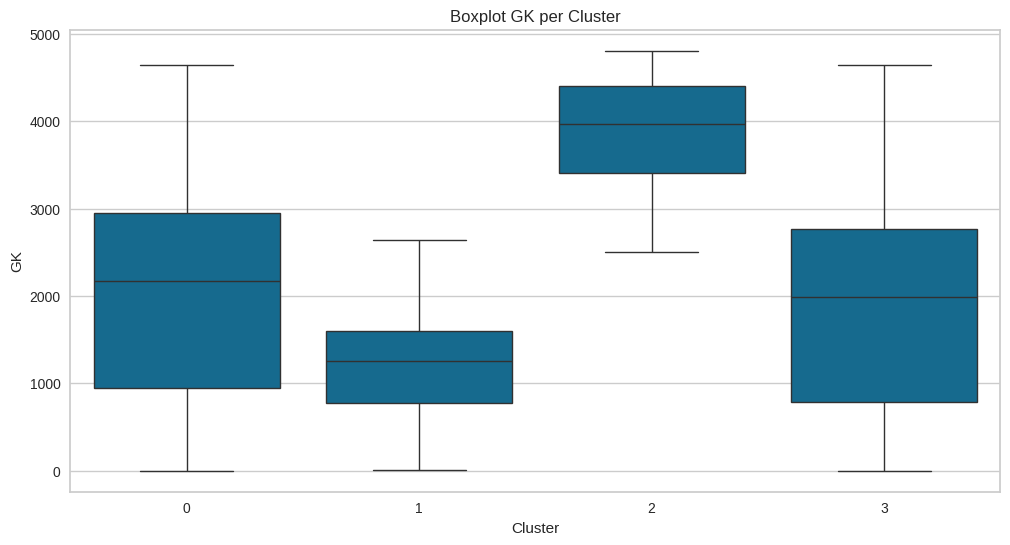

Text(0, 0.5, 'Upah')

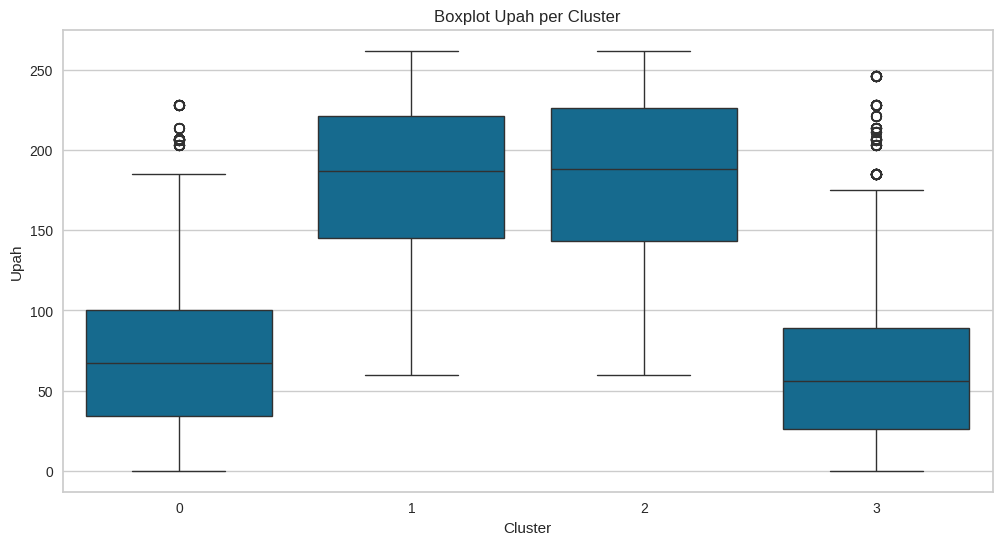

In [85]:
# visualisasi peng per cluster
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_encoded, x='cluster', y='peng')
plt.title('Boxplot Pengeluaran per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Pengeluaran')
plt.show()

# visualisasi ump per cluster
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_encoded, x='cluster', y='ump')
plt.title('Boxplot UMP per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Pengeluaran')
plt.show()

# visualiasi GK per cluster
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_encoded, x='cluster', y='gk')
plt.title('Boxplot GK per Cluster')
plt.xlabel('Cluster')
plt.ylabel('GK')
plt.show()

# visualisasi upah per cluster
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_encoded, x='cluster', y='upah')
plt.title('Boxplot Upah per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Upah')

# Contoh interpretasi
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **GK:**   2,061.42
- **PENG:** 1,707.83
- **UMP:** 64.64
- **UPAH:** 72.25
- **Analisis:** Cluster ini menunjukkan nilai garis kemiskinan dan pengeluaran yang tinggi, namun UMP dan upah tergolong rendah. Ini menandakan adanya ketimpangan, di mana kebutuhan dasar masyarakat (garis kemiskinan dan pengeluaran) cukup besar tetapi tingkat upah tidak memadai untuk menutupinya. Perlu perhatian kebijakan untuk menyesuaikan upah minimum agar lebih

## Cluster 2:
- **GK:** 1,249.59  
- **PENG:** 1,266.05
- **UMP:** 172.24
- **UPAH:** 182.72
- **Analisis:** Cluster ini mencerminkan wilayah dengan upah minimum dan upah tertinggi, namun dengan tingkat garis kemiskinan dan pengeluaran yang relatif rendah. Artinya, standar hidup layak lebih mudah dicapai, dan ada kemungkinan tingkat kesejahteraan masyarakat cukup baik, atau terdapat kebijakan pengupahan yang sangat progresif.



## Cluster 3:
- **GK:** 3,885.56  
- **PENG:** 1,307.03
- **UMP:** 173.60
- **UPAH:** 183.03
- **Analisis:** Cluster ini memiliki garis kemiskinan tertinggi, diikuti oleh upah dan UMP yang tinggi. Meski pengeluarannya sedang, wilayah dalam cluster ini menunjukkan kesenjangan ekonomi cukup tajam, karena batas kemiskinannya sangat tinggi, sehingga meskipun upah tinggi, belum tentu cukup untuk mendorong masyarakat keluar dari kemiskinan.

## Cluster 4:
- **GK:** 1,869.59
- **PENG:** 443.05
- **UMP:** 60.29
- **UPAH:** 63.29
- **Analisis:** Cluster ini menggambarkan wilayah dengan pengeluaran dan upah paling rendah, serta UMP yang rendah. Nilai garis kemiskinan juga rendah, menunjukkan bahwa ini mungkin wilayah dengan biaya hidup sangat rendah, namun juga berisiko tinggi terhadap kemiskinan absolut jika tidak ada intervensi ekonomi lanjutan.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [90]:
# Buat DataFrame baru berisi kolom-kolom penting
df_clustering = df_encoded[['gk', 'peng', 'ump', 'upah', 'cluster']]

# Simpan ke file CSV
df_clustering.to_csv('hasil_clustering.csv', index=False)